In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (replace this with your dataset)
data = pd.read_csv('crop_sensor.csv')

# Encode the 'Crop' field
data_encoded = pd.get_dummies(data, columns=['Crop'])

# Split the dataset into features and labels
X = data_encoded.drop('Disease', axis=1)
y = data_encoded['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Use the model for prediction
new_data = pd.DataFrame({'Temperature': [40], 'Humidity': [50], 'Crop': ['Maize']})

# Ensure that new_data_encoded contains all required columns
missing_columns = set(X.columns) - set(new_data.columns)
for column in missing_columns:
    new_data[column] = 0

new_data_encoded = pd.get_dummies(new_data, columns=['Crop'], drop_first=True)  # Drop first to avoid multicollinearity

# Ensure the columns are in the same order as in X_train
new_data_encoded = new_data_encoded[X_train.columns]

prediction = clf.predict(new_data_encoded)
print(f'Prediction: {prediction}')


Accuracy: 0.54
Prediction: ['No']


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace this with your dataset path)
data = pd.read_csv('crop_sensor.csv')

# Encode the 'Crop' field
data_encoded = pd.get_dummies(data, columns=['Crop'])

# Split the dataset into features and labels
X = data_encoded.drop('Disease', axis=1)
y = data_encoded['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)  # Encode y_train for training

# Train an XGBoost Classifier
clf = XGBClassifier()
clf.fit(X_train, y_encoded)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, le.inverse_transform(y_pred))  # Decode predictions
print(f'Accuracy: {accuracy}')

# Use the model for prediction
new_data = pd.DataFrame({'Temperature': [40], 'Humidity': [50], 'Crop': ['Maize']})

# Ensure that new_data_encoded contains all required columns
missing_columns = set(X.columns) - set(new_data.columns)
for column in missing_columns:
    new_data[column] = 0

new_data_encoded = pd.get_dummies(new_data, columns=['Crop'], drop_first=True)  # Drop first to avoid multicollinearity

# Ensure the columns are in the same order as in X_train
new_data_encoded = new_data_encoded[X_train.columns]

prediction = clf.predict(new_data_encoded)
print(f'Prediction: {le.inverse_transform(prediction)[0]}')  # Decode prediction


Accuracy: 0.51
Prediction: Yes


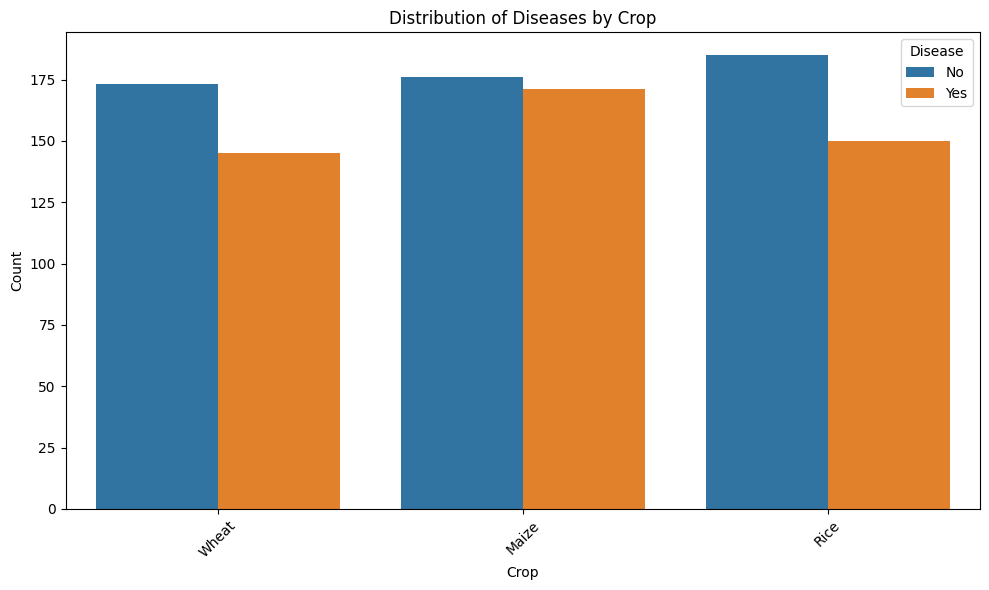

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot showing the distribution of diseases for each crop
plt.figure(figsize=(10, 6))
sns.countplot(x='Crop', hue='Disease', data=data)
plt.title('Distribution of Diseases by Crop')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disease')
plt.tight_layout()
plt.show()


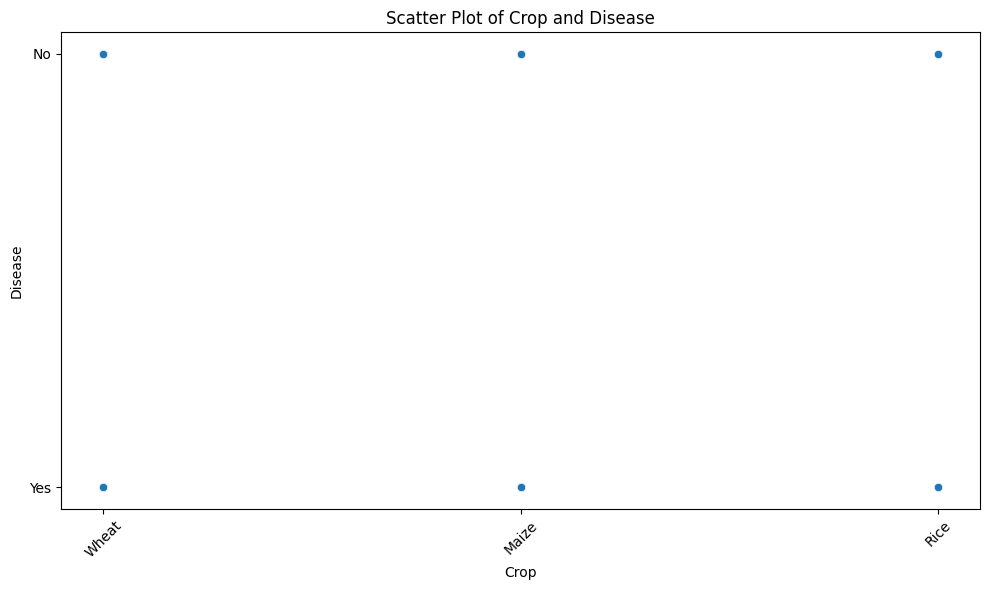

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns 'Crop' and 'Disease'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Crop', y='Disease', data=data)
plt.title('Scatter Plot of Crop and Disease')
plt.xlabel('Crop')
plt.ylabel('Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
import os
os.environ['GRADIENT_WORKSPACE_ID']='3059fa02-d742-4ab0-b8c3-6e50155ef7b5_workspace'
os.environ['GRADIENT_ACCESS_TOKEN']='SmjCNMruqooFvwT1tveG3V88ei3v5fGo'

In [41]:
import pandas as pd

# Sample crop disease dataset (replace with your actual data)
data = {
    'Crop': ['Rice', 'Rice', 'Corn', 'Corn', 'Wheat', 'Wheat'],
    'Disease': ['Bacterial Leaf Blight', 'Rice Blast', 'Northern Leaf Blight', 'Corn Smut', 'Stem Rust', 'Septoria Leaf Blotch'],
    'Prevention': ['Copper fungicides', 'Balanced fertilization, resistant varieties', 'Crop rotation, fungicides', 'Resistant varieties, crop rotation', 'Fungicides, resistant varieties', 'Fungicides, crop rotation']
}

df = pd.DataFrame(data)

def get_prevention(crop):
  """
  This function takes a crop name as input and searches the provided dataset
  (replace with your actual data source) to find potential prevention methods
  for the corresponding disease.

  Args:
      crop (str): The name of the crop.

  Returns:
      str: A string containing potential prevention methods,
          or "Information not available" if no match is found.
  """

  try:
    # Select rows where the 'Crop' matches the input
    filtered_df = df[df['Crop'] == crop.capitalize()]

    # Extract prevention methods (if any)
    prevention = filtered_df['Prevention'].values[0]
    return prevention
  except IndexError:
    return "Information not available"

# Get user input for crop
crop_name = input("Enter the crop name (e.g., Rice, Corn, Wheat): ")

# Find prevention methods
prevention = get_prevention(crop_name)

# Display results
if prevention:
  print(f"Potential prevention methods for {crop_name} diseases:")
  print(prevention)
else:
  print(f"Information on prevention for {crop_name} diseases not available in the current dataset.")

Potential prevention methods for Wheat diseases:
Fungicides, resistant varieties
